# Model complexity vs accuracy - empirical anlaysis

This notebook is intended as a moderate stress test for the DSX infrastructure. Notebook generates a known function, adds random noise to it and runs an ML algorithm on a wild goose chase asking it to fit and predict based on this data.

Right now I am running this against 10 Million points. To increase the complexity, you can do two things
 - Increase the number of points (direct hit)
 - Increase the complexity of the function (indirect)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Create a linear stream of `10`million points between `-50` and `50`.

In [102]:
x = np.arange(-50,50,0.00001)
x.shape

(10000000,)

Create random noise of same dimension

In [103]:
bias = np.random.standard_normal(x.shape)

### Define the function

In [104]:
y2 = np.cos(x)**3 * (x**2/max(x)) + bias*5

### Train test split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y2, test_size=0.3)

In [106]:
x_train.shape

(7000000,)

Plotting algorithms cannot work with millions of points, so you downsample just for plotting

In [107]:
stepper = int(x_train.shape[0]/1000)
stepper

7000

Text(0.5,1,'Distribution of training points')

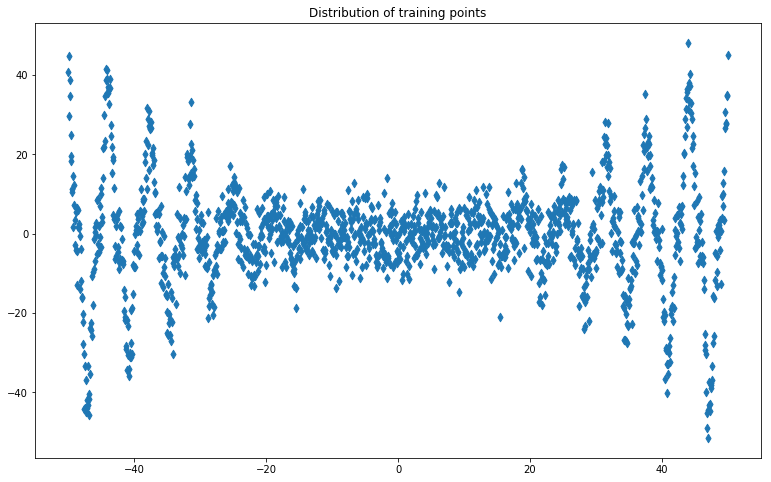

In [108]:
fig, ax = plt.subplots(1,1, figsize=(13,8))
ax.scatter(x[::stepper],y2[::stepper], marker='d')
ax.set_title('Distribution of training points')

### Curve fitting
Let us define a function that will try to fit against the training data. It starts with lower order and sequentially increases the complexity of the model. The hope is, somewhere here is the sweet spot of low bias and variance. We will find it empirically

In [109]:
def greedy_fitter(x_train, y_train, x_test, y_test, max_order=25):
    """Fitter will try to find the best order of 
    polynomial curve fit for the given synthetic data"""
    import time
    train_predictions=[]
    train_rmse=[]
        
    test_predictions=[]
    test_rmse=[]
    
    for order in range(1,max_order+1):
        t1 = time.time()
        coeff = np.polyfit(x_train, y_train, deg=order)
        n_order = order
        count = 0
        y_predict = np.zeros(x_train.shape)
        while n_order >=0:
            y_predict += coeff[count]*x_train**n_order
            count+=1
            n_order = n_order-1
        
        # append to predictions
        train_predictions.append(y_predict)
        
        # find training errors
        current_train_rmse =np.sqrt(mean_squared_error(y_train, y_predict))
        train_rmse.append(current_train_rmse)
        
        # predict and find test errors
        n_order = order
        count = 0
        y_predict_test = np.zeros(x_test.shape)
        while n_order >=0:
            y_predict_test += coeff[count]*x_test**n_order
            count+=1
            n_order = n_order-1
        
        # append test predictions
        test_predictions.append(y_predict_test)
        # find test errors
        current_test_rmse =np.sqrt(mean_squared_error(y_test, y_predict_test))
        test_rmse.append(current_test_rmse)
        
        t2 = time.time()
        elapsed = round(t2-t1, 3)
        print("Elapsed: " + str(elapsed) + \
              "s Order: " + str(order) + \
              " Train RMSE: " + str(round(current_train_rmse, 4)) + \
              " Test RMSE: " + str(round(current_test_rmse, 4)))
    
    return (train_predictions, train_rmse, test_predictions, test_rmse)

Run the model. Change the `max_order` to higher or lower if you wish

In [110]:
%%time
complexity=50
train_predictions, train_rmse, test_predictions, test_rmse = greedy_fitter(
    x_train, y_train, x_test, y_test, max_order=complexity)

Elapsed: 0.826s Order: 1 Train RMSE: 13.1708 Test RMSE: 13.1646
Elapsed: 1.264s Order: 2 Train RMSE: 13.1646 Test RMSE: 13.1582
Elapsed: 2.061s Order: 3 Train RMSE: 13.1646 Test RMSE: 13.1582
Elapsed: 2.727s Order: 4 Train RMSE: 13.1627 Test RMSE: 13.1564
Elapsed: 3.4s Order: 5 Train RMSE: 13.1627 Test RMSE: 13.1564
Elapsed: 4.144s Order: 6 Train RMSE: 13.1585 Test RMSE: 13.1519
Elapsed: 5.01s Order: 7 Train RMSE: 13.1585 Test RMSE: 13.1519
Elapsed: 5.749s Order: 8 Train RMSE: 13.0983 Test RMSE: 13.0891
Elapsed: 6.43s Order: 9 Train RMSE: 13.0983 Test RMSE: 13.0891
Elapsed: 7.193s Order: 10 Train RMSE: 12.876 Test RMSE: 12.865
Elapsed: 7.955s Order: 11 Train RMSE: 12.876 Test RMSE: 12.865
Elapsed: 8.777s Order: 12 Train RMSE: 12.4236 Test RMSE: 12.4185
Elapsed: 9.727s Order: 13 Train RMSE: 12.4236 Test RMSE: 12.4185
Elapsed: 10.495s Order: 14 Train RMSE: 11.9035 Test RMSE: 11.9015
Elapsed: 11.452s Order: 15 Train RMSE: 11.9035 Test RMSE: 11.9014
Elapsed: 11.929s Order: 16 Train RMSE: 1

/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 20.433s Order: 25 Train RMSE: 10.6051 Test RMSE: 10.601


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 20.777s Order: 26 Train RMSE: 10.6168 Test RMSE: 10.613


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 20.747s Order: 27 Train RMSE: 10.6168 Test RMSE: 10.613


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 22.231s Order: 28 Train RMSE: 9.7878 Test RMSE: 9.7872


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 23.836s Order: 29 Train RMSE: 9.7878 Test RMSE: 9.7872


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 25.725s Order: 30 Train RMSE: 9.5223 Test RMSE: 9.5227


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 25.587s Order: 31 Train RMSE: 9.5223 Test RMSE: 9.5227


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 25.041s Order: 32 Train RMSE: 9.3192 Test RMSE: 9.3201


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 26.645s Order: 33 Train RMSE: 9.3192 Test RMSE: 9.3201


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 27.387s Order: 34 Train RMSE: 9.2033 Test RMSE: 9.2045


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 28.049s Order: 35 Train RMSE: 9.2033 Test RMSE: 9.2045


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 29.866s Order: 36 Train RMSE: 9.1679 Test RMSE: 9.1692


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 31.415s Order: 37 Train RMSE: 9.1679 Test RMSE: 9.1692


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 33.605s Order: 38 Train RMSE: 9.1874 Test RMSE: 9.1887


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 33.52s Order: 39 Train RMSE: 9.1874 Test RMSE: 9.1886


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 33.863s Order: 40 Train RMSE: 9.1526 Test RMSE: 9.1539


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 34.658s Order: 41 Train RMSE: 9.1526 Test RMSE: 9.1539


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 35.006s Order: 42 Train RMSE: 9.0739 Test RMSE: 9.0755


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 35.865s Order: 43 Train RMSE: 9.0739 Test RMSE: 9.0755


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 36.595s Order: 44 Train RMSE: 8.3806 Test RMSE: 8.3852


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 39.269s Order: 45 Train RMSE: 8.3806 Test RMSE: 8.3852


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 38.545s Order: 46 Train RMSE: 8.4328 Test RMSE: 8.4372


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 42.502s Order: 47 Train RMSE: 8.4328 Test RMSE: 8.4372


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 41.427s Order: 48 Train RMSE: 8.5054 Test RMSE: 8.5096


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 43.643s Order: 49 Train RMSE: 8.5054 Test RMSE: 8.5096


/Users/atma6951/anaconda3/envs/pychakras/lib/python3.6/site-packages/ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


Elapsed: 43.055s Order: 50 Train RMSE: 8.5792 Test RMSE: 8.5831
CPU times: user 41min 15s, sys: 4min 3s, total: 45min 19s
Wall time: 17min 31s


## Plot results
How well did the models fit against training data?

### Training results

CPU times: user 1.1 s, sys: 39.6 ms, total: 1.14 s
Wall time: 918 ms


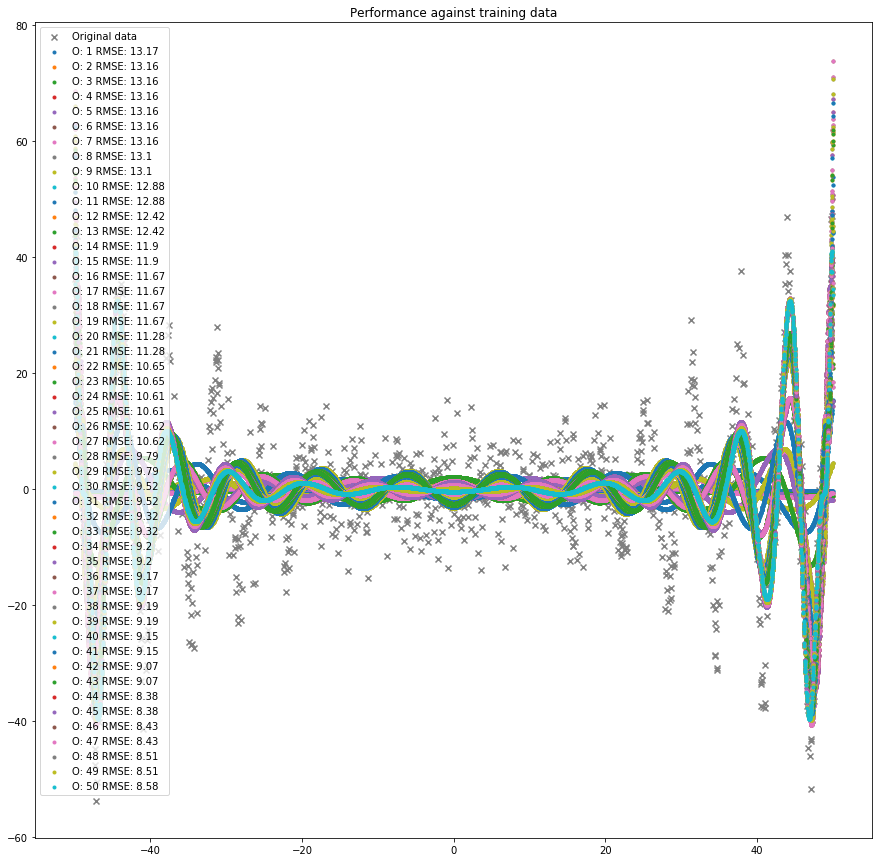

In [111]:
%%time
fig, axes = plt.subplots(1,1, figsize=(15,15))
axes.scatter(x_train[::stepper], y_train[::stepper], 
             label='Original data', color='gray', marker='x')
order=1
for p, r in zip(train_predictions, train_rmse):
    axes.scatter(x_train[:stepper], p[:stepper], 
                 label='O: ' + str(order) + " RMSE: " + str(round(r,2)),
                 marker='.')
    order+=1
axes.legend(loc=0)
axes.set_title('Performance against training data')

### Test results

CPU times: user 893 ms, sys: 25.9 ms, total: 919 ms
Wall time: 901 ms


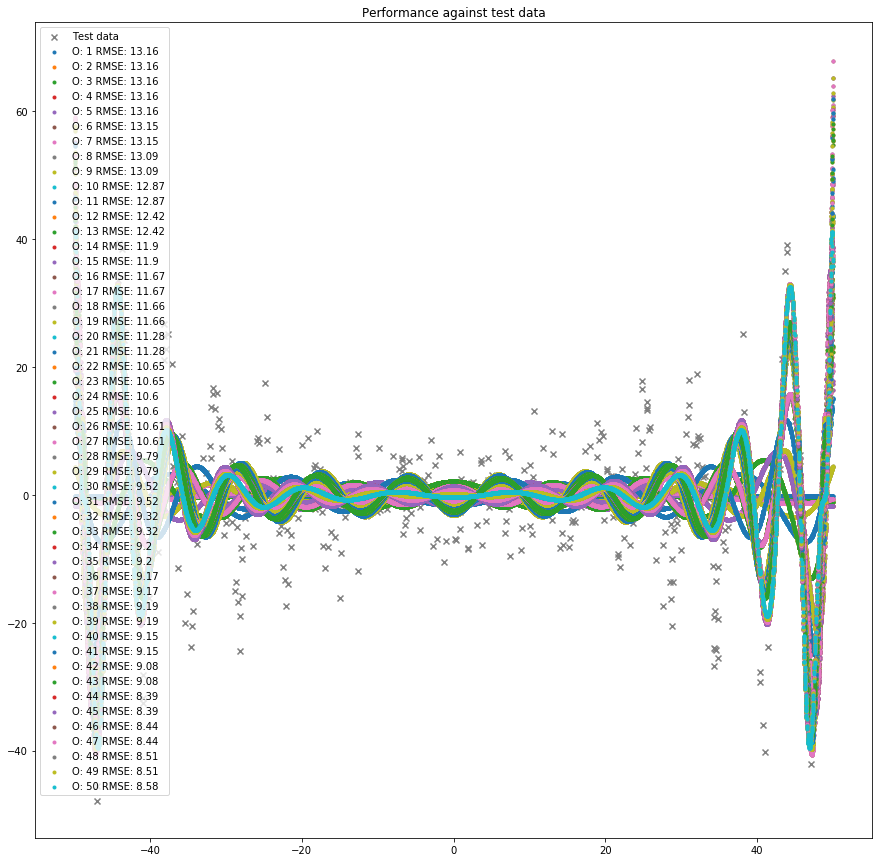

In [112]:
%%time
fig, axes = plt.subplots(1,1, figsize=(15,15))
axes.scatter(x_test[::stepper], y_test[::stepper], 
             label='Test data', color='gray', marker='x')
order=1
for p, r in zip(test_predictions, test_rmse):
    axes.scatter(x_test[:stepper], p[:stepper], 
                 label='O: ' + str(order) + " RMSE: " + str(round(r,2)),
                 marker='.')
    order+=1
axes.legend(loc=0)
axes.set_title('Performance against test data')

### Bias vs Variance

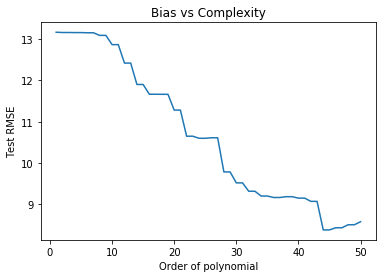

In [120]:
ax = plt.plot(np.arange(1,complexity+1),test_rmse)
plt.title('Bias vs Complexity'); plt.xlabel('Order of polynomial'); plt.ylabel('Test RMSE')
ax[0].axes.get_yaxis().get_major_formatter().set_useOffset(False)
plt.savefig('Model efficiency.png')

#### CPU usage during curve fitting

![](curve_fitting_cpu_usage.png)